## Part 2: Clinical Application

### Contents
Fill out this notebook as part 2 of your final project submission.

**You will have to complete the Code (Load Metadata & Compute Resting Heart Rate) and Project Write-up sections.**  

- [Code](#Code) is where you will implement some parts of the **pulse rate algorithm** you created and tested in Part 1 and already includes the starter code.
  - [Imports](#Imports) - These are the imports needed for Part 2 of the final project. 
    - [glob](https://docs.python.org/3/library/glob.html)
    - [os](https://docs.python.org/3/library/os.html)
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
  - [Load the Dataset](#Load-the-dataset)  
  - [Load Metadata](#Load-Metadata)
  - [Compute Resting Heart Rate](#Compute-Resting-Heart-Rate)
  - [Plot Resting Heart Rate vs. Age Group](#Plot-Resting-Heart-Rate-vs.-Age-Group)
- [Project Write-up](#Project-Write-Up) to describe the clinical significance you observe from the **pulse rate algorithm** applied to this dataset, what ways/information that could improve your results, and if we validated a trend known in the science community. 

### Dataset (CAST)

The data from this project comes from the [Cardiac Arrythmia Suppression Trial (CAST)](https://physionet.org/content/crisdb/1.0.0/), which was sponsored by the National Heart, Lung, and Blood Institute (NHLBI). CAST collected 24 hours of heart rate data from ECGs from people who have had a myocardial infarction (MI) within the past two years.[1] This data has been smoothed and resampled to more closely resemble PPG-derived pulse rate data from a wrist wearable.[2]

1. **CAST RR Interval Sub-Study Database Citation** - Stein PK, Domitrovich PP, Kleiger RE, Schechtman KB, Rottman JN. Clinical and demographic determinants of heart rate variability in patients post myocardial infarction: insights from the Cardiac Arrhythmia Suppression Trial (CAST). Clin Cardiol 23(3):187-94; 2000 (Mar)
2. **Physionet Citation** - Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.

-----

### Code
#### Imports

When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages are imported for you here. We recommend you don't import other packages outside of the [Standard Library](https://docs.python.org/3/library/) , otherwise the grader might not be able to run your code.

In [1]:
import glob
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
print(sns.__version__)

0.9.0


#### Load the dataset

The dataset is stored as [.npz](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez.html) files. Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz. The subject ID is the name of the file. You will use these files to compute resting heart rate.

Demographics metadata is stored in a file called 'metadata.csv'. This CSV has three columns, one for subject ID, age group, and sex. You will use this file to make the association between resting heart rate and age group for each gender.

Find the dataset in `../datasets/crisdb/`

In [3]:
hr_filenames = glob.glob('/data/crisdb/*.npz')

In [4]:
len(hr_filenames)

1537

In [5]:
hr_filenames[0]

'/data/crisdb/e190a.npz'

Note that, 

*..Each file contains roughly 24 hours of heart rate data in the 'hr' array sampled at 1Hz.* 

Not all npz files are of the same length

In [6]:
npz = np.load(hr_filenames[11])

df_temp = pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, 
                           orient='index')
df_temp

,0,1,2,3,4,5,6,7,8,9,...,89091,89092,89093,89094,89095,89096,89097,89098,89099,89100
hr,155.167347,165.46338,149.842905,147.746948,144.714268,148.426193,152.094118,198.366407,185.302326,185.302326,...,155.294118,143.348228,189.89011,205.128205,213.333333,205.773552,188.458983,213.333333,216.380952,213.333333


In [7]:
npz = np.load(hr_filenames[1])

df_temp = pd.DataFrame.from_dict({item: npz[item] for item in npz.files}, 
                           orient='index')
df_temp

,0,1,2,3,4,5,6,7,8,9,...,86046,86047,86048,86049,86050,86051,86052,86053,86054,86055
hr,87.272727,87.272727,87.272727,87.272727,87.272727,87.272727,87.272727,87.645987,88.275862,88.275862,...,128.629391,134.835574,168.143251,167.272727,164.952308,156.949213,148.946117,140.735076,128.295815,143.203043


In [8]:
print(np.load(hr_filenames[1])['hr'])

[  87.27272727   87.27272727   87.27272727 ...,  140.73507623  128.29581481
  143.20304267]


#### Load Metadata
Load the metadata file into a datastructure that allows for easy lookups from subject ID to age group and sex.

In [9]:
metadata_filename = '/data/crisdb/metadata.csv'

# Load the metadata file into this variable.
# with open(metadata_filename, 'r') as f:
#     metadata = f.readlines()
#     print(metadata)

metadata = pd.read_csv(metadata_filename, index_col=None)
metadata.head()

,subject,age,sex
0,e198a,20-24,Male
1,e198b,20-24,Male
2,e028b,30-34,Male
3,e028a,30-34,Male
4,e061b,30-34,Male


In [10]:
metadata.describe()

,subject,age,sex
count,1543,1543,1543
unique,1543,11,2
top,e101a,60-64,Male
freq,1,313,1266


In [41]:
metadata.sex.value_counts(dropna=False)

Male      1266
Female     277
Name: sex, dtype: int64

In [39]:
metadata.age.value_counts(dropna=False)

60-64    313
65-69    291
55-59    261
70-74    196
50-54    164
45-49    124
75-79     98
40-44     62
35-39     28
30-34      4
20-24      2
Name: age, dtype: int64

### Test the code

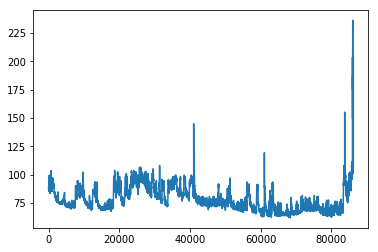

In [13]:
filename = hr_filenames[1]
data = np.load(filename)
hr_data = data['hr']
np.percentile(hr_data,5)
plt.plot(hr_data)

### Test the code

In [14]:
subject = filename.split('/')[3].split('.')[0]
metadata[metadata['subject'] == subject]['age'].values[0]

'65-69'

In [15]:
metadata[metadata['subject'] == subject]['sex'].values[0]

'Male'

#### Compute Resting Heart Rate
For each subject we want to compute the resting heart rate while keeping track of which age group this subject belongs to. An easy, robust way to compute the resting heart rate is to use the lowest 5th percentile value in the heart rate timeseries.

In [16]:
def AgeAndRHR(metadata, filename):

    # Load the heart rate timeseries
    data = np.load(filename)
    hr_data = data['hr']
    
    # Compute the resting heart rate from the timeseries by 
    # finding the lowest 5th percentile value in hr_data
    rhr = np.percentile(hr_data, 5)

    # Find the subject ID from the filename.
    subject = filename.split('/')[3].split('.')[0]

    # Find the age group for this subject in metadata.
    age_group = metadata[metadata['subject'] == subject]['age'].values[0]
    
    # Find the sex for this subject in metadata.
    sex = metadata[metadata['subject'] == subject]['sex'].values[0]

    return age_group, sex, rhr

df = pd.DataFrame(data=[AgeAndRHR(metadata, filename) for filename in hr_filenames],
                  columns=['age_group', 'sex', 'rhr'])

In [17]:
df.head()

,age_group,sex,rhr
0,60-64,Female,89.302326
1,65-69,Male,65.641026
2,45-49,Male,56.928458
3,60-64,Male,68.571429
4,50-54,Male,84.395604


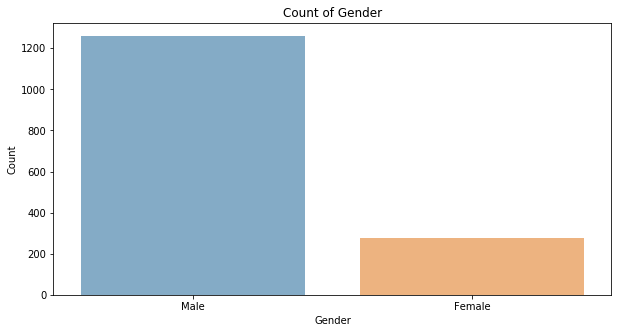

In [18]:
sex_count = df['sex'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(sex_count.index, sex_count.values, alpha = 0.6)
plt.title('Count of Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

#### Plot Resting Heart Rate vs. Age Group
We'll use [seaborn](https://seaborn.pydata.org/) to plot the relationship. Seaborn is a thin wrapper around matplotlib, which we've used extensively in this class, that enables higher-level statistical plots.

We will use [lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) to plot the mean of the resting heart rates for each age group along with the 95% confidence interval around the mean. Learn more about making plots that show uncertainty [here](https://seaborn.pydata.org/tutorial/relational.html#aggregation-and-representing-uncertainty).

In [19]:
# !pip show seaborn

In [20]:
# print(sns.__version__)

In [21]:
# !pip install seaborn==0.9.0

In [22]:
# print(sns.__version__)

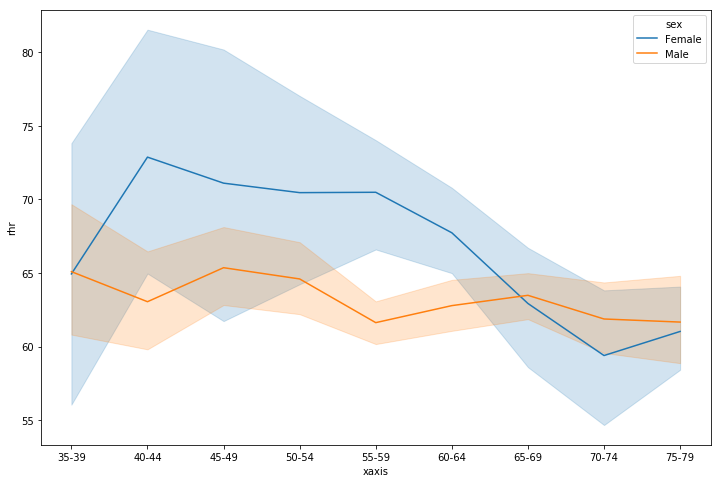

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt

labels = sorted(np.unique(df.age_group))
df['xaxis'] = df.age_group.map(lambda x: labels.index(x)).astype('float')
plt.figure(figsize=(12, 8))
sns.lineplot(x='xaxis', y='rhr', hue='sex', data=df)
_ = plt.xticks(np.arange(len(labels)), labels)

In [34]:
df.groupby(['sex','age_group'])['rhr'].mean()

sex     age_group
Female  35-39        64.936157
        40-44        72.880497
        45-49        71.109613
        50-54        70.464430
        55-59        70.488809
        60-64        67.733858
        65-69        62.926454
        70-74        59.386176
        75-79        61.024178
Male    35-39        65.092105
        40-44        63.046920
        45-49        65.359438
        50-54        64.594842
        55-59        61.622980
        60-64        62.780684
        65-69        63.480979
        70-74        61.871341
        75-79        61.661049
Name: rhr, dtype: float64

In [35]:
df.groupby(['sex','age_group'])['rhr'].count()

sex     age_group
Female  35-39          4
        40-44          8
        45-49         15
        50-54         18
        55-59         46
        60-64         67
        65-69         61
        70-74         39
        75-79         19
Male    35-39         24
        40-44         54
        45-49        109
        50-54        146
        55-59        215
        60-64        246
        65-69        230
        70-74        157
        75-79         79
Name: rhr, dtype: int64

### Clinical Conclusion
Answer the following prompts to draw a conclusion about the data.
> 1. For women, we see the heart rate is higher **for age-groups between 35-39 - 65-69.**
> 2. For men, we see **the heart rate fluctuates around 65 with less variations when compared to female heart rate** 
> 3. In comparison to men, women's heart rate is **higher and fluctuates between ~ 60-73** 
> 4. What are some possible reasons for what we see in our data?
    **One of the main reason could be explained by the smaller data size for females (18% vs 82%) compared to male**
> 5. What else can we do or go and find to figure out what is really happening? How would that improve the results?
**By spliting the data by groups, one could see that we need to collect more data for females in the age ranges of 35-54 (please see above for the breakdown)**
> 6. Did we validate the trend that average resting heart rate increases up until middle age and then decreases into old age? How?
**Of the two gender types, male data doesnt reflect this conclusion. For female group data, it is not possible to make any conclusion due to the smaller data size.**